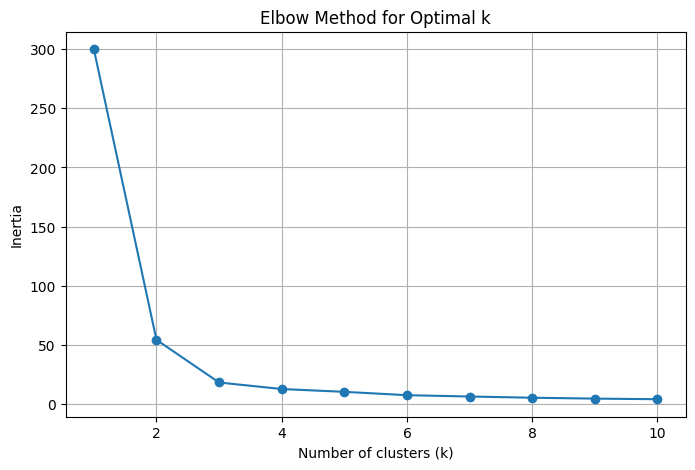

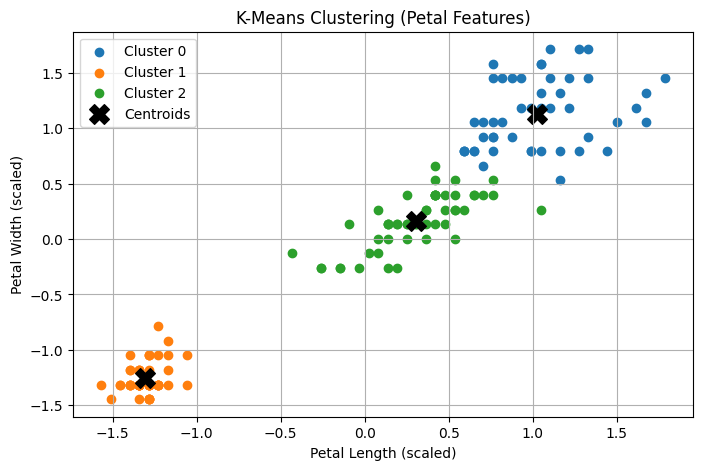

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/iris (2).csv")  # Update path if necessary

# Select relevant features
X = df[['petal_length', 'petal_width']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply KMeans with optimal k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 5))
for i in range(optimal_k):
    cluster_points = X_scaled[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering (Petal Features)')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.legend()
plt.grid(True)
plt.show()
